In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.copy_on_write = True

data = pd.read_csv("pima-indians-diabetes.csv")
for x in data:
    if(x != "class"):
        med = data[x].median()
        # IQR
        Q1 = np.percentile(data[x], 25)

        Q3 = np.percentile(data[x], 75)
        IQR = Q3 - Q1
        x_size = data[x].size
        for i in range(int(x_size)):
            if data.iloc[i][x] >= (Q3+1.5*IQR) or data.iloc[i][x] <= (Q1-1.5*IQR):
                data.iloc[i][x] = med
        data[x] = [med if value >= (
            Q3+1.5*IQR) or value <= (Q1-1.5*IQR) else value for value in data[x]]
for x in data:
    if x != "class":
        print("min value of ", x, data[x].min())
        print("max value of ", x, data[x].max())

# normalization min max scaler
data_normalize=data.copy()
for column in data_normalize.columns:
    data_normalize[column] = ((data_normalize[column]- data_normalize[column].abs().min() )/ (data_normalize[column].abs().max() - data_normalize[column].abs().min() ))*7 +5


for x in data_normalize:
    if x != "class":
        print("min value of ", x, data_normalize[x].min())
        print("max value of ", x, data_normalize[x].max())


min value of  pregs 0.0
max value of  pregs 13.0
min value of  plas 44.0
max value of  plas 199.0
min value of  pres 38.0
max value of  pres 106.0
min value of  skin 0.0
max value of  skin 63.0
min value of  test 0.0
max value of  test 318.0
min value of  BMI 18.2
max value of  BMI 50.0
min value of  pedi 0.078
max value of  pedi 1.191
min value of  Age 21.0
max value of  Age 66.0
min value of  pregs 5.0
max value of  pregs 12.0
min value of  plas 5.0
max value of  plas 12.0
min value of  pres 5.0
max value of  pres 12.0
min value of  skin 5.0
max value of  skin 12.0
min value of  test 5.0
max value of  test 12.0
min value of  BMI 5.0
max value of  BMI 12.0
min value of  pedi 5.0
max value of  pedi 12.0
min value of  Age 5.0
max value of  Age 12.0


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("pima-indians-diabetes.csv")
for x in data:
    if(x != "class"):
        med = data[x].median()
        # IQR
        Q1 = np.percentile(data[x], 25)

        Q3 = np.percentile(data[x], 75)
        IQR = Q3 - Q1
        x_size = data[x].size
        for i in range(int(x_size)):
            if data.iloc[i][x] >= (Q3+1.5*IQR) or data.iloc[i][x] <= (Q1-1.5*IQR):
                data.iloc[i][x] = med
        data[x] = [med if value >= (
            Q3+1.5*IQR) or value <= (Q1-1.5*IQR) else value for value in data[x]]

for x in data:
    if x != "class":
        print("mean value of ", x, data[x].mean())
        print("std value of ", x, data[x].std())
        print()

print()
print()

# copy the data
data_z_scaled = data.copy()

# apply normalization technique
for column in data_z_scaled:
    data_z_scaled[column] = (
        data_z_scaled[column] - data_z_scaled[column].mean()) / data_z_scaled[column].std()

for x in data_z_scaled:
    if x != "class":
        print("mean value of ", x, data_z_scaled[x].mean())
        print("std value of ", x, data_z_scaled[x].std())
        print()


mean value of  pregs 3.7825520833333335
std value of  pregs 3.270644231185031

mean value of  plas 121.65625
std value of  plas 30.43828582241517

mean value of  pres 72.19661458333333
std value of  pres 11.146722742501334

mean value of  skin 20.4375
std value of  skin 15.698553733035284

mean value of  test 60.919270833333336
std value of  test 77.63566579465243

mean value of  BMI 32.19895833333334
std value of  BMI 6.410557943798964

mean value of  pedi 0.42766731770833327
std value of  pedi 0.2451623740187652

mean value of  Age 32.760416666666664
std value of  Age 11.055384847014684



mean value of  pregs -5.551115123125783e-17
std value of  pregs 0.9999999999999998

mean value of  plas -1.3877787807814457e-17
std value of  plas 1.0

mean value of  pres 4.001428817919835e-16
std value of  pres 0.9999999999999999

mean value of  skin -1.3877787807814457e-17
std value of  skin 1.0

mean value of  test -5.3198186596622086e-17
std value of  test 1.0

mean value of  BMI -6.1293562817

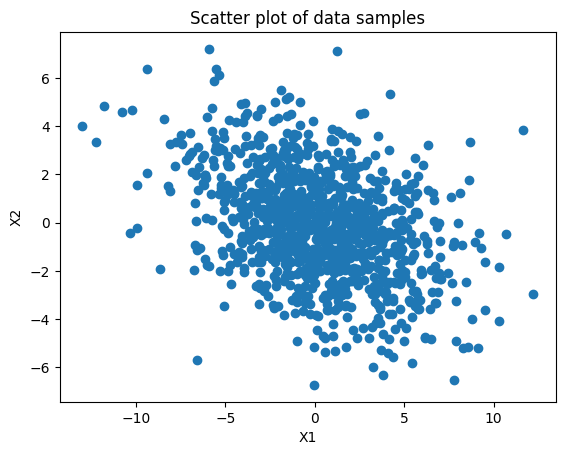

Q 2 (b):
The eigen values are [14.  4.]
The eigen vectors are [[ 0.9486833   0.31622777]
 [-0.31622777  0.9486833 ]]


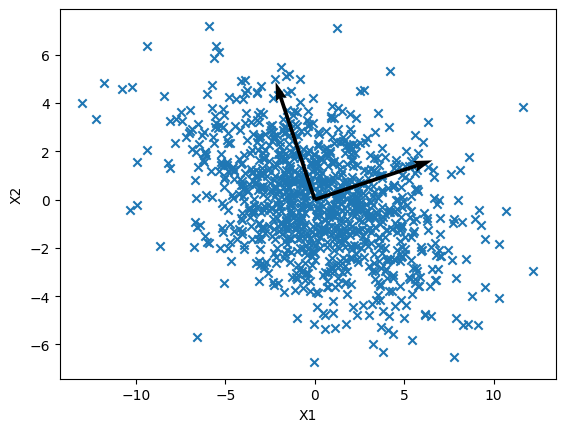

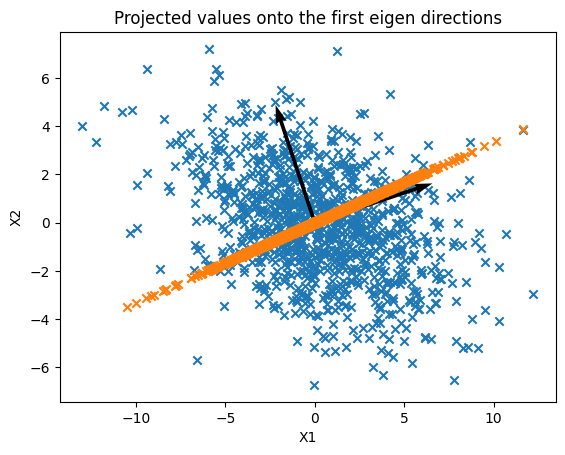

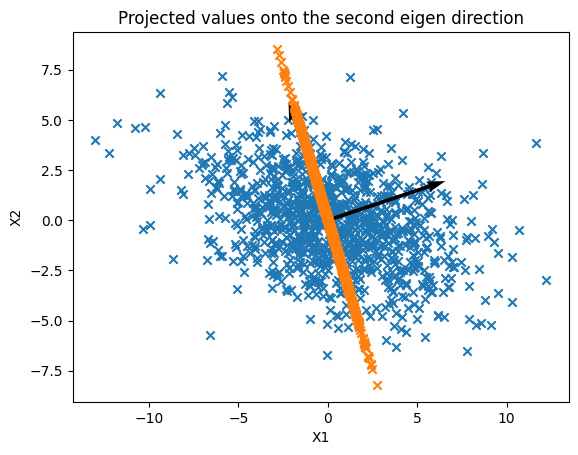

Q 2 (d):
The Reconstruction error between new and original matrix is 2.9945310952502546e-14


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA


# 2
# generating 2-dimensional synthetic data of 1000 samples
mean_d = [0, 0]
cov = [[13, -3], [-3, 5]]
data = np.random.multivariate_normal(mean_d, cov, 1000)
df0 = pd.DataFrame(data, columns=['X1', 'X2'])

# (a)
# scatter plot of the data samples
plt.scatter(df0['X1'], df0['X2'])
plt.title("Scatter plot of data samples")
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# (b)
# computing the eigenvalues and eigenvectors of the covariance matrix
print("Q 2 (b):")
w, v = np.linalg.eig(cov)
print("The eigen values are", w)
print("The eigen vectors are", v)

# plotting the Eigen directions (with arrows/lines) onto the scatter plot of data
plt.scatter(df0['X1'], df0['X2'], marker='x')
plt.quiver(v[0][0], v[0][1], scale=4)
plt.quiver(v[1][0], v[1][1], scale=4)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# (c)
# First Eigen Direction
unit1 = [v[0][0] / ((v[0][0]) ** 2 + (v[0][1]) ** 2) ** (1 / 2),
         v[0][1] / ((v[0][0]) ** 2 + (v[0][1]) ** 2) ** (1 / 2)]  # unit vector in direction of first eigen vector
sum1 = df0['X1'] * unit1[0] + df0['X2'] * unit1[1]
df0['sum1'] = sum1
# Projecting the data on to the first eigen direction
e1x = df0['sum1'] * unit1[0]
e1y = df0['sum1'] * unit1[1]
e1x = [round(num, 3) for num in e1x.tolist()]
e1y = [round(num, 3) for num in e1y.tolist()]
# superimposed scatter plots with eigen directions
plt.scatter(df0['X1'], df0['X2'], marker='x')
plt.quiver(v[0][0], v[0][1], scale=4)
plt.quiver(v[1][0], v[1][1], scale=4)
plt.scatter(e1x, e1y, marker='x')
plt.title('Projected values onto the first eigen directions')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# Second Eigen Direction
unit2 = [v[1][0] / ((v[1][0]) ** 2 + (v[1][1]) ** 2) ** (1 / 2),
         v[1][1] / ((v[1][0]) ** 2 + (v[1][1]) ** 2) ** (1 / 2)]  # unit vector in direction of second eigen vector
sum2 = df0['X1'] * unit2[0] + df0['X2'] * unit2[1]
df0['sum2'] = sum2
# Projecting the data on to the second eigen direction
e2x = df0['sum2'] * unit2[0]
e2y = df0['sum2'] * unit2[1]
e2x = [round(num, 3) for num in e2x.tolist()]
e2y = [round(num, 3) for num in e2y.tolist()]
# superimposed scatter plots with eigen directions
plt.scatter(df0['X1'], df0['X2'], marker='x')
plt.quiver(v[0][0], v[0][1], scale=4)
plt.quiver(v[1][0], v[1][1], scale=4)
plt.scatter(e2x, e2y, marker='x')
plt.title('Projected values onto the second eigen direction')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# (d)
# reconstructing the data sample using both eigen vectors
print("Q 2 (d):")
df0 = df0.drop(['sum2', 'sum1'], axis=1)
pca = PCA(n_components=2)
dfx = pca.inverse_transform(pca.fit_transform(df0))
mse = np.linalg.norm((dfx - df0), None)
print("The Reconstruction error between new and original matrix is", mse)


Q 3 (a):
           x1        x2
0    1.637099 -0.460884
1   -1.571361  0.001477
2    0.173632 -1.559259
3   -1.843546  0.643192
4   -0.354060  2.519463
..        ...       ...
763  2.392283 -0.336139
764 -0.365180  0.383912
765 -0.345638 -0.074010
766 -0.748263 -1.249422
767 -1.410288  0.431745

[768 rows x 2 columns]
The Variances are 1.992 and 1.853
The Eigen Values are 1.992 and 1.853


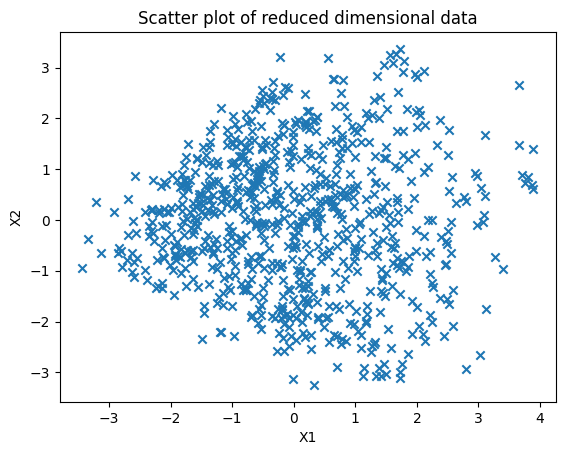

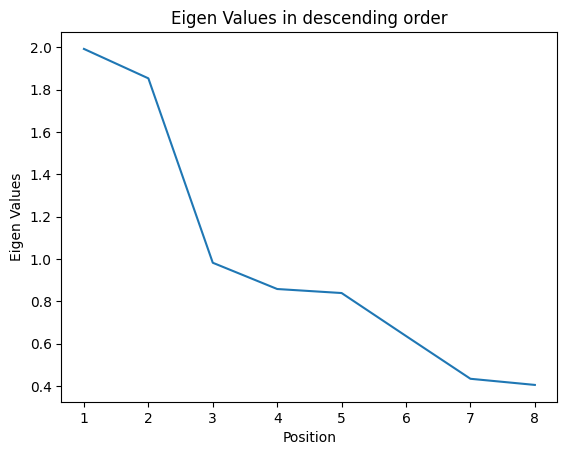

Q 3 (c):
The covariance matrix for value of l = 2 :
        x1     x2
x1  1.992 -0.000
x2 -0.000  1.853
The covariance matrix for value of l = 3 :
        x1     x2     x3
x1  1.992 -0.000 -0.000
x2 -0.000  1.853 -0.000
x3 -0.000 -0.000  0.982
The covariance matrix for value of l = 4 :
        x1     x2     x3     x4
x1  1.992  0.000  0.000  0.000
x2  0.000  1.853 -0.000 -0.000
x3  0.000 -0.000  0.982  0.000
x4  0.000 -0.000  0.000  0.858
The covariance matrix for value of l = 5 :
        x1     x2     x3     x4     x5
x1  1.992 -0.000  0.000 -0.000  0.000
x2 -0.000  1.853 -0.000 -0.000  0.000
x3  0.000 -0.000  0.982 -0.000 -0.000
x4 -0.000 -0.000 -0.000  0.858 -0.000
x5  0.000  0.000 -0.000 -0.000  0.839
The covariance matrix for value of l = 6 :
        x1     x2     x3     x4     x5     x6
x1  1.992  0.000  0.000 -0.000 -0.000 -0.000
x2  0.000  1.853  0.000 -0.000 -0.000 -0.000
x3  0.000  0.000  0.982 -0.000  0.000 -0.000
x4 -0.000 -0.000 -0.000  0.858  0.000  0.000
x5 -0.000 -0.000

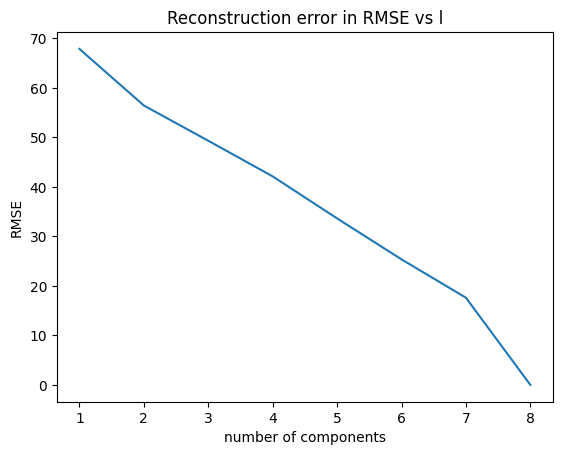

Q 3 (d):
The covariance matrix of original data is
        pregs   plas   pres   skin   test    BMI   pedi    Age
pregs  1.000  0.118  0.209 -0.097 -0.108  0.028  0.005  0.561
plas   0.118  1.000  0.205  0.060  0.180  0.228  0.082  0.274
pres   0.209  0.205  1.000  0.026 -0.051  0.272  0.022  0.326
skin  -0.097  0.060  0.026  1.000  0.473  0.374  0.153 -0.101
test  -0.108  0.180 -0.051  0.473  1.000  0.172  0.199 -0.074
BMI    0.028  0.228  0.272  0.374  0.172  1.000  0.124  0.078
pedi   0.005  0.082  0.022  0.153  0.199  0.124  1.000  0.036
Age    0.561  0.274  0.326 -0.101 -0.074  0.078  0.036  1.000


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import statistics as st

data = pd.read_csv("pima-indians-diabetes.csv")
for x in data:
    if(x != "class"):
        med = data[x].median()
        # IQR
        Q1 = np.percentile(data[x], 25)

        Q3 = np.percentile(data[x], 75)
        IQR = Q3 - Q1
        x_size = data[x].size
        for i in range(int(x_size)):
            if data.iloc[i][x] >= (Q3+1.5*IQR) or data.iloc[i][x] <= (Q1-1.5*IQR):
                data.iloc[i][x] = med
        data[x] = [med if value >= (
            Q3+1.5*IQR) or value <= (Q1-1.5*IQR) else value for value in data[x]]

df = pd.DataFrame()
for x in data:
    if(x != "class"):
        df[x] = data[x]
df.head()

# apply normalization technique
for column in df:
    df[column] = ((
        df[column] - df[column].mean()) / (df[column].std()))

corr_matrix = df.corr()
val, vec = np.linalg.eig(corr_matrix.to_numpy())
eigen = {}
for i in range(len(val)):
    eigen[round(val[i], 3)] = [round(num, 3) for num in vec[i]]
# arranging the eigen vectors in descending order of their respective eigen values
sorted_eigen = sorted(eigen.items(), reverse=True)
eigen_analysis = {}
for i in range(len(val)):
    eigen_analysis[round(sorted_eigen[i][0], 3)] = [round(num, 3)
                                                    for num in sorted_eigen[i][1]]

print("Q 3 (a):")
pca = PCA(n_components=2)
reduced = pca.fit_transform(df)
new_df = pd.DataFrame(reduced, columns=['x1', 'x2'])
print(new_df)

# calculating variances
var1 = st.variance(new_df['x1'].values.tolist())
var2 = st.variance(new_df['x2'].values.tolist())
print("The Variances are", round(var1, 3), "and", round(var2, 3))
print("The Eigen Values are", round(
    sorted_eigen[0][0], 3), "and", round(sorted_eigen[1][0], 3))
# Scatter plot of reduced dimensional data with l=2
plt.scatter(new_df['x1'], new_df['x2'], marker='x')
plt.title('Scatter plot of reduced dimensional data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# (b)
# Plotting all the eigenvalues in the descending order
n = np.linspace(1, 8, 8)
plt.plot(n, eigen_analysis.keys())
plt.title('Eigen Values in descending order')
plt.xlabel('Position')
plt.ylabel('Eigen Values')
plt.show()


# calculating the  reconstruction errors in terms of RMSE considering the different values of l (=1, 2, ..., 8)
col = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']
print("Q 3 (c):")
components = [1, 2, 3, 4, 5, 6, 7, 8]
RMSE = []
for n in components:
    pca = PCA(n_components=n)
    reduced_to_l = pca.fit_transform(df)
    dfn = pca.inverse_transform(pca.fit_transform(df))
    # printing the covariance matrix of each of the l-dimensional representations (l = 2, 3, ..., 8)
    if n != 1:
        cols = col[0:n]
        dfl = pd.DataFrame(data=reduced_to_l, columns=[cols])
        cov_l = pd.DataFrame(dfl.cov().T.round(decimals=3))
        with pd.option_context('display.max_rows', None, 'display.max_columns', None):
            print("The covariance matrix for value of l =", n, ":\n", cov_l)

    rmse = np.linalg.norm((df - dfn), None)
    RMSE.append(round(rmse, 3))

# Plotting the reconstruction errors in terms of RMSE considering the different values of l (=1, 2, ..., 8)
components = np.linspace(1, 8, 8)
plt.plot(components, RMSE)
plt.title('Reconstruction error in RMSE vs l')
plt.xlabel('number of components')
plt.ylabel('RMSE')
plt.show()


# (d)
# Comparing covariance matrices of original data and reconstructed data for l =8
print("Q 3 (d):")
cov_original = pd.DataFrame(df.cov().T.round(decimals=3))
# more options can be specified also
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print("The covariance matrix of original data is\n", cov_original)
# The covariance matrix of reconstructed data is already computed in (c) part
